In [2]:
from MathProject import *

In [3]:
import os
listdir = os.listdir("./asset/")
from tqdm import tqdm
Config = {
    3206: [267.78174459934235, -55.311890840361734],
    3283: [831.0437180995941, 165.5],
    3342: [3103.682450890541, -90],
    3549: [3756.4347579479218, 0],
}

Newton = {3206: 23, 3283: 42, 3342: 45, 3549: 30}
fit = {3206: 59, 3283: 139, 3342: 190, 3549: 110}

colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]


In [4]:
Images = Config.copy()

print()
for i, image_path in  zip(tqdm(range(len(listdir)), desc="Chargement Des Images"), listdir):
    # origin, filtered, segmented, binarized, gray, contours
    Images[int(image_path.split(".")[0])] = ImageProcessing(
        f"./asset/{image_path}",
        Config[int(image_path.split(".")[0])][1],
    )

Chargement Des Images:   0%|          | 0/4 [00:00<?, ?it/s]

Chargement Des Images: 100%|██████████| 4/4 [00:16<00:00,  4.03s/it]


name of the image is  Calculer la Surface


ApproximationPoly: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


OpenCv Area 696909.0
La valeur approximative de la surface de l'image 3206 est 616713.6787241055
Error of area 80195.32127589453, 11.507287361175495%


ApproximationPoly: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


OpenCv Area 531477.5
La valeur approximative de la surface de l'image 3283 est 458180.7883826544
Error of area 73296.71161734557, 13.791122223865651%


ApproximationPoly: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


OpenCv Area 800188.0
La valeur approximative de la surface de l'image 3342 est 694866.5828319938
Error of area 105321.41716800618, 13.162084056247556%


ApproximationPoly: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


OpenCv Area 771271.0
La valeur approximative de la surface de l'image 3549 est 687887.3672515111
Error of area 83383.63274848892, 10.811197717597176%


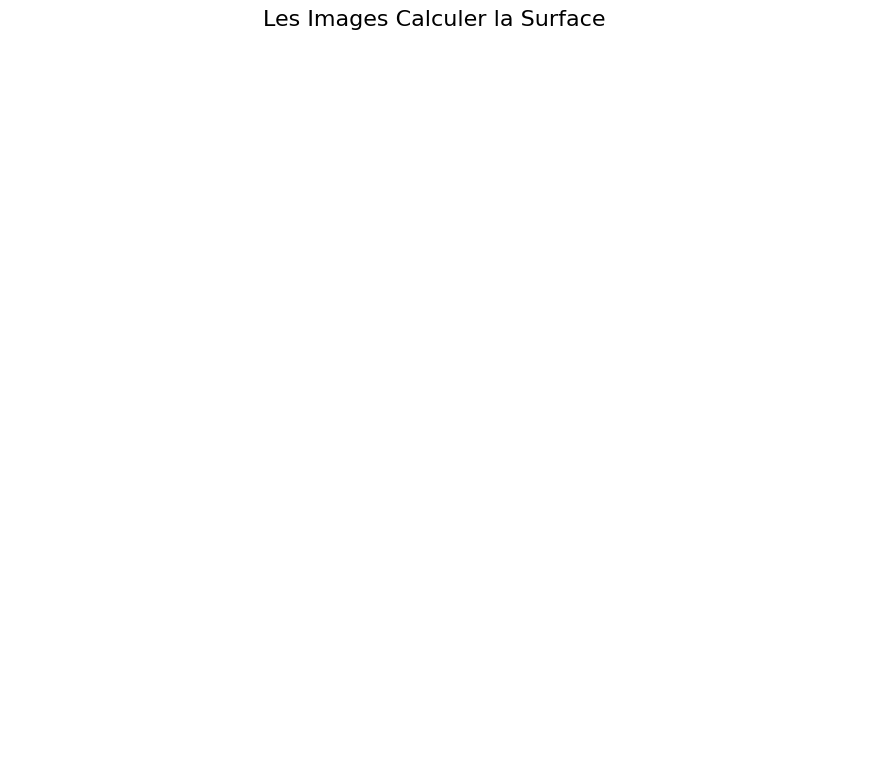

In [70]:
import random

def Preparation(index, key, element):
    Th = Config[key][0]
    c = filter_contours_by_perimeter(element[index], Th)
    cx,cy = Get_Center(c)
    return c,cx,cy

def triangle_area(x1, y1, x2, y2, x3, y3):
    return 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))

NameTitles = ["origine", "filtered", "segmented", "binarized", "gray", "contours",'partitionnement','Interpolation','Approximation','Visualisation approximant morceaux sélectionnés','Calculer la Surface']
Guide = f"""
Veuillez choisir une image à afficher:<br>
"""
for i,name in enumerate(NameTitles):
    Guide+= f"""
{i}: {name}\n
"""
index = int(input(Guide))
Name = NameTitles[index]

def get_index(lst:ndarray, target):
    print(lst)
    for index, tup in enumerate(lst):
        print(tup)
        if tup[0] == target:
            return index
    return -1 

print('name of the image is ', Name)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Les Images {Name}", fontsize=16)
fig.set_size_inches(12, 8)

for ax,(key,element) in zip(axs.flatten(),Images.items()):
    ax.invert_yaxis()
    
    if index != 9:
        ax.set_aspect("equal")
        ax.set_adjustable("box")

    match index:
        case 5:
            c, cx,cy = Preparation(index,key, element)
            ax.scatter(c[:,:,0][0],c[:,:,1][0])
            ax.plot(c[:,:,0],c[:,:,1])
            ax.scatter(cx,cy,c='r')
        case 6:
            c, *cxy = Preparation(5,key, element)
            ax.plot(c[:,:,0],c[:,:,1])
            circle_radius,END = plot_circle_and_sectors(c,cxy,10)
            circle = patches.Circle(cxy, circle_radius, color="blue", fill=False)
            ax.add_patch(circle)
            for i in range(10):
                ax.plot([cxy[0],END[i][0]],[cxy[1],END[i][1]],c='r')    
        case 7:
            c, Cx, Cy = Preparation(5,key, element)
            sector = Newton[key]
            # sector = 10
            conf, sector = NewtonInterpolation(c, Cx, Cy, sector, sector)
            points, Err = PlotPoly(c, Cx, Cy, conf, sector)

            for X, Pn in points:
                ax.plot(X, Pn)
            print(
                f"Num Sector {sector}, Err {Err}"
            )

        case 8:
            c, Cx,Cy = Preparation(5,key, element)
            # sector = fit[key]
            sector = 8
            conf, sector = ApproximationPoly(c, Cx, Cy, sector, sector)
            points, Err = PlotPlyFit(c, Cx, Cy, conf, sector)
            cxy = (Cx,Cy)
            ax.imshow(element[0],cmap='gray')
            for X, Pn in points:
                ax.plot(X, Pn)
            circle_radius,END = plot_circle_and_sectors(c,cxy,sector)
            circle = patches.Circle(cxy, circle_radius, color="blue", fill=False)
            ax.add_patch(circle)
            for i in range(10):
                ax.plot([cxy[0],END[i][0]],[cxy[1],END[i][1]],c='r') 
            print(
                f"Num Sector {sector}, Err {Err}"
            )
        case 9:
            c, Cx,Cy = Preparation(5,key, element)

            if(True):
                sector = fit[key]
                sector = 10
                conf, sector = ApproximationPoly(c, Cx, Cy, sector, sector)
                points, Err = PlotPlyFit(c, Cx, Cy, conf, sector)
            else:
                # sector = Newton[key]
                sector = 10
                conf, sector = NewtonInterpolation(c, Cx, Cy, sector, sector)
                points, Err = PlotPoly(c, Cx, Cy, conf, sector)

            angles = generate_angles(num_sectors=sector)
            R=process_points(c,[Cx,Cy],angles)
            
            X, Pn = points[random.choice(list(range(len(points))))]
            
            i = 0
            while(True):
                Target,_ = classify_angles([X[i],Pn[i]],[Cx, Cy],angles)

                if(Target == None):
                    i+=1
                else: break

            Cpoints = R[Target]

            ApproX = [x[0] for x in Cpoints]
            ApproY = [x[1] for x in Cpoints]
            for approx in zip(X, Pn):
                Searched = list(np.isclose(ApproX , approx[0]))
                if (sum(Searched)):
                    ax.plot([approx[0],approx[0]],[approx[1],ApproY[Searched.index(True)]],c='r')
            
            ax.plot(ApproX,ApproY)
            ax.plot(X, Pn)
            print(len(Cpoints),len(X))
            print(
                f"Num Sector {sector}, Err {Err}"
            )
        case 10:
            c, Cx,Cy = Preparation(5,key, element)
            sector = fit[key]
            conf, sector = ApproximationPoly(c, Cx, Cy, sector, sector)
            points, Err = PlotPlyFit(c, Cx, Cy, conf, sector)
            Area = 0
            for SectorPoints in points:
                for ApproX,ApproY in zip(zip(SectorPoints[0][:-1],SectorPoints[0][1:]),zip(SectorPoints[1][:-1],SectorPoints[1][1:])):
                    Area += triangle_area(Cx,Cy,ApproX[0],ApproY[0],ApproX[1],ApproY[1],)
                    # ax.plot([Cx,ApproX[0],ApproX[1],Cx],[Cy,ApproY[0],ApproY[1],Cy],c='r')
            print(f'OpenCv Area {cv2.contourArea(c)}')
            print(f"La valeur approximative de la surface de l'image {key} est {Area}")
            # np.round()
            print(f'Error of area {abs(Area-cv2.contourArea(c))}, {(abs(Area-cv2.contourArea(c))/cv2.contourArea(c))*100}%')
        case _:
            ax.imshow(element[index],cmap='gray')
    if index != 9:
        ax.axis("off")
fig.tight_layout(pad=2.0)
plt.show()

In [37]:
import pandas as pd

In [44]:
# data = [[1, 2], [3, 4]]
# pd.DataFrame(data, columns=["Foo", "Bar"])

# Fonction pour calculer les normes
def L_inf(error):
    return max(abs(e) for e in error)

def L_1(error):
    return sum(abs(e) for e in error)

def L_2(error):
    return sum(e ** 2 for e in error) ** 0.5

# 3206 3283 3342 3549
print()
for key,element in Images.items():
    c, Cx,Cy = Preparation(5,key, element)
    sector = fit[key]
    conf, sector = ApproximationPoly(c, Cx, Cy, sector, sector)
    points, Err = PlotPlyFit(c, Cx, Cy, conf, sector)

    angles = generate_angles(num_sectors=sector)
    R=process_points(c,[Cx,Cy],angles)


    error_table = []
    for inx,Initial in enumerate(R.values()):
        initX = [x[0] for x in Initial][::-1]
        initY = [x[1] for x in Initial][::-1]
        Y = []
        for ApproX,ApproY in zip(points[inx][0],points[inx][1]):
            Searched = list(np.isclose(initX , ApproX))
            if (not sum(Searched)):
                continue
            else:
                inex = Searched.index(True)
                Y.append(initY[Searched.index(True)] - ApproY)
        error_inf = L_inf(Y)
        error_1 = L_1(Y)
        error_2 = L_2(Y)  
        error_table.append([error_inf, error_1, error_2])
            
    print(f"Tableau des Erreurs Réelles de l'image {key}:")
    df =pd.DataFrame(error_table, columns=["L_inf","L_1","L_2"])
    df.to_csv(f'./Data/LesNorm_{key}.csv', index=False)


ApproximationPoly: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Tableau des Erreurs Réelles de l'image 3206:


ApproximationPoly: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Tableau des Erreurs Réelles de l'image 3283:


ApproximationPoly: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Tableau des Erreurs Réelles de l'image 3342:


ApproximationPoly: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


Tableau des Erreurs Réelles de l'image 3549:


In [ ]:
def triangle_area(x1, y1, x2, y2, x3, y3):
    return 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))